#                                     Beer Analysis

In [1]:
#import packages to be used for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
sns.set()
from warnings import simplefilter
simplefilter(action='ignore')

In [2]:
#read in dataset into pandas
df = pd.read_csv('BeerDataScienceProject.csv', encoding = 'ISO-8859-1')

In [3]:
#take a look at dataframe 
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [4]:
#take a look at shape
print(df.shape)

(528870, 13)


In [5]:
#take a look at properties of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
beer_ABV              508590 non-null float64
beer_beerId           528870 non-null int64
beer_brewerId         528870 non-null int64
beer_name             528870 non-null object
beer_style            528870 non-null object
review_appearance     528870 non-null float64
review_palette        528870 non-null float64
review_overall        528870 non-null float64
review_taste          528870 non-null float64
review_profileName    528755 non-null object
review_aroma          528870 non-null float64
review_text           528751 non-null object
review_time           528870 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [6]:
#look for any trends in dataset
df.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


In [7]:
#take a look at missing values
df.isnull().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

In [8]:
#calculate % of missing ABV entries over total entries
20280 / 528870

0.03834590731181576

In [9]:
#since the amount is less than 5%, drop the rows without values since its small% and using mean is not an option
df.dropna(inplace=True)
df.isnull().sum()

beer_ABV              0
beer_beerId           0
beer_brewerId         0
beer_name             0
beer_style            0
review_appearance     0
review_palette        0
review_overall        0
review_taste          0
review_profileName    0
review_aroma          0
review_text           0
review_time           0
dtype: int64

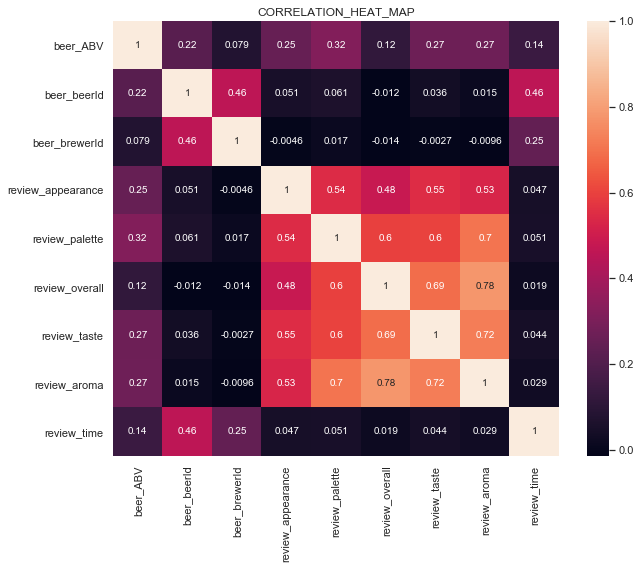

In [10]:
#look for trends/correlations by plotting a correlation heatmap
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("CORRELATION_HEAT_MAP")
corr = df.corr()
sns.heatmap(corr, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

### Correlation heatmap shows that there is strong correlation between overall review and review_aroma.  There is also strong correlation between review_aroma and review_taste.  Finally, there is strong correlation between review_palette and review_aroma.  

### The Correlation heatmap shows a strong negative correlation between overall review and beer_brewer_Id indicating the beer review is not correlated with which brewery is serving that beer.

## 1.) Rank top 3 Breweries which produce the strongest beers?

In [11]:
#sort values in dataframe by ABV and brewerId
df_strong = df.sort_values(['beer_ABV', 'beer_brewerId'], ascending = False)
df_strong.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
12889,57.70,73368,6513,Schorschbräu Schorschbock 57%,Eisbock,4.0,4.0,4.0,4.0,kappldav123,3.5,"New world strongest beer. Very limited, only 3...",1316780901
12909,43.00,57856,6513,Schorschbräu Schorschbock 43%,Eisbock,3.5,4.0,4.0,4.0,Sunnanek,4.0,43% ABV - this is so crazy! A: Pour is warm am...,1309974178
12910,43.00,57856,6513,Schorschbräu Schorschbock 43%,Eisbock,4.0,4.0,3.5,4.0,kappldav123,4.5,"The bottle looks really great, handnumbered an...",1274469798
12911,39.44,55712,6513,Schorschbräu Schorschbock 40%,Eisbock,3.0,3.0,3.0,2.0,orangesol,3.0,Thanks to foofaa for sharing his sample with m...,1321041551
12912,39.44,55712,6513,Schorschbräu Schorschbock 40%,Eisbock,3.5,3.5,3.0,3.5,thepeter,3.5,Very lucky to get a 2oz sample of this at a ta...,1274645294


In [12]:
#filter out the dataframe even further by only looking at beers with ABV > 19
df_strong_total = df_strong[df_strong['beer_ABV'] >19]
len(df_strong_total)

458

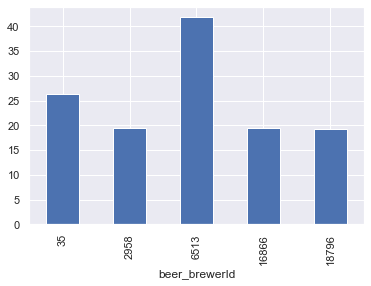

In [13]:
#perform groupby between brewery and class beer_ABV to visually see which breweries serve the strongest beer
df_strong_total.groupby('beer_brewerId').beer_ABV.mean().plot(kind='bar')

In [14]:
#take a look at same groupby mathematically since visually 2958, 16866 and 18796 appear the same
df_strong_total.groupby('beer_brewerId').beer_ABV.mean()

beer_brewerId
35       26.406542
2958     19.500000
6513     41.840000
16866    19.500000
18796    19.200000
Name: beer_ABV, dtype: float64

In [15]:
#filter out the dataframe even further to look at only the unique breweryID's with the strongest beers
df_strong_unique = df_strong_total['beer_brewerId'].unique()
len(df_strong_unique)


5

In [16]:
#list out the 5 breweryIds
print(df_strong_unique)

[ 6513    35 16866  2958 18796]


## Therefore, the three brewery id's with the strongest beers are Brewery ID 6513, 35, and 16866. The top five brewery id's with the strongest beers are Brewery ID 1.) 6513, 2.) 35, 3.) 16866, 4.) 2958 and 5.) 18796.

In [17]:
#take a look at how many unique beer names are in the strong beer dataset
df_name_unique = df_strong_total['beer_name'].unique()
len(df_name_unique)

13

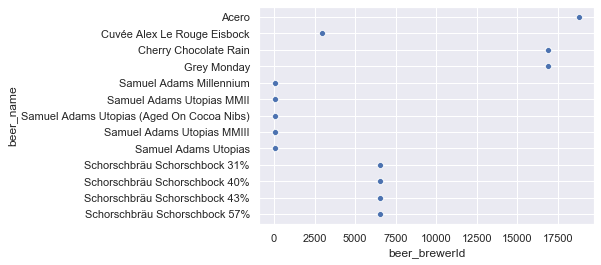

In [18]:
#plot the top 5 highest ABV serving breweries against the beer names to look for trends
sns.scatterplot(x = 'beer_brewerId', y = 'beer_name', data = df_strong_total)
plt.show()

### This shows that while brewery id 6513 serves the strongest beer that brewery id 35 serves the most different kinds of strong beers.

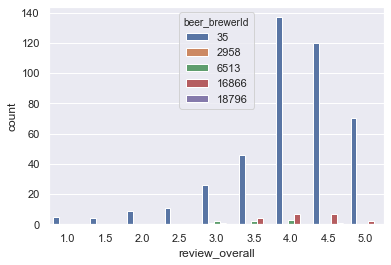

In [19]:
#plot the top 5 strongest breweries against the overall review of those breweries
sns.countplot(x='review_overall', data=df_strong_total, hue='beer_brewerId')

### This shows that even though beer_brewerId 6513 serves the strongest beers, 6513 does not have the strongest reviews. The plot shows brewer Id's 35 and 2958 have much better average reviews.

## 2.) Which year did beers enjoy the highest ratings?

In [20]:
#first convert to readable datetime from unix
df[ 'review_time' ] = pd.to_datetime(df[ 'review_time' ], unit = 's' )

In [21]:
#take a look at dataframe
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,2009-02-16 20:57:03
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",2009-03-01 13:44:57
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",2009-03-01 14:10:04
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",2009-02-15 19:12:25
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",2010-12-30 18:53:26


In [22]:
#make sure that date is in datetime
df.dtypes

beer_ABV                     float64
beer_beerId                    int64
beer_brewerId                  int64
beer_name                     object
beer_style                    object
review_appearance            float64
review_palette               float64
review_overall               float64
review_taste                 float64
review_profileName            object
review_aroma                 float64
review_text                   object
review_time           datetime64[ns]
dtype: object

In [23]:
#get max time date stamp
df.review_time.max()

Timestamp('2012-01-11 10:10:56')

In [24]:
#get min time date stamp
df.review_time.min()

Timestamp('1998-01-10 00:00:01')

### This shows the dataset spans from 1998 to 2012-almost 15 years.

In [25]:
#create column in data frame for year only
df['year'] = df.review_time.dt.year

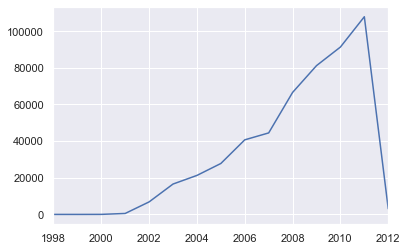

In [26]:
#plot year against count to notice any trends from year to year
df.year.value_counts().sort_index().plot()

### This shows the reviews have steadily climbed over time with the highest count of reviews in 2011

(array([728659.00000289, 729390.00000289, 730120.00000289, 730851.00000289,
        731581.00000289, 732312.00000289, 733042.00000289, 733773.00000289,
        734503.00000289]), <a list of 9 Text xticklabel objects>)

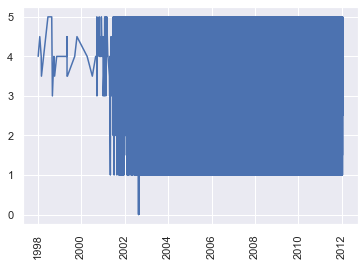

In [27]:
#take a look visually at how time and review are correlated 
df = df.sort_values('review_time', ascending = True)
plt.plot(df['review_time'],df['review_overall'])
plt.xticks(rotation = 'vertical')

### So the plot above shows that 1998, 1999 and 2000 enjoyed the highest reviews and that 2003 had the lowest reviews. 

In [28]:
#do a groupby between reviews and year to determine if 1998,1999, or 2000 have highest average reviews
df.groupby('year').review_overall.mean()

year
1998    4.045455
1999    4.000000
2000    4.233333
2001    3.961896
2002    3.817551
2003    3.772793
2004    3.806632
2005    3.844657
2006    3.809104
2007    3.819879
2008    3.840345
2009    3.868749
2010    3.869430
2011    3.833394
2012    3.839082
Name: review_overall, dtype: float64

## This indicates that the year 2000 had the highest average reviews and the year 2003 had the lowest average reviews

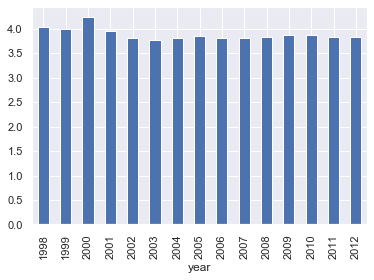

In [29]:
#perform groupby barplot between overall_review and year
df.groupby('year').review_overall.mean().plot(kind='bar')

## In conclusion based on data visualizations and statistical analysis, the year 2000 enjoyed the highest average beer ratings

## 3.) Based on the user’s ratings which factors are important among taste, aroma,appearance, and palette?

In [30]:
# first take a look at statistical correlation values between ratings and all other features
df.corr()['review_overall'].sort_values(ascending=False)

review_overall       1.000000
review_aroma         0.780310
review_taste         0.689276
review_palette       0.598048
review_appearance    0.483091
beer_ABV             0.119495
year                 0.020058
beer_beerId         -0.011635
beer_brewerId       -0.014264
Name: review_overall, dtype: float64

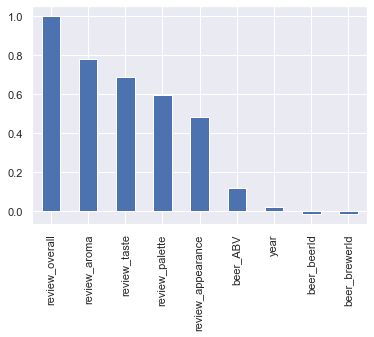

In [31]:
#now take a look visually at the correlations between reviews and aroma, taste, palette, and appearance. 
df.corr()['review_overall'].sort_values(ascending=False).plot(kind = 'bar')

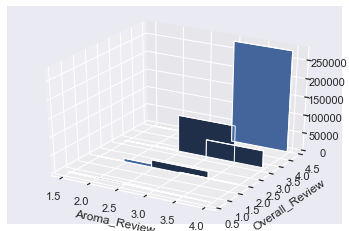

In [32]:
#take a closer look at the trends seen with the overall review and aroma reviews of beers w/a 3d histogram
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
x = df['review_aroma']
y = df['review_overall']

hist, xedges, yedges, = np.histogram2d(x,y,bins=(4,4))
xpos, ypos = np.meshgrid(xedges[:1]+xedges[1:],yedges[:-1]+yedges[1:])
xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)
dx = xedges [1] - xedges[0]
dy = yedges [1] - yedges[1]
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos,dx, dy, dz, color='b', zsort='average')
plt.xlabel("Aroma_Review")
plt.ylabel("Overall_Review")

plt.show()

## The data visualization as well as the statistical analysis shows that review aroma is the most correlated with overall user rating followed by review_taste, review_palette and review_appearance. This shows that review_appearance is the least correlated with overall user ratings.  

In [33]:
# create ml model to see which feature is the strongest in determining overall rating
x_cols = ['review_taste', 'review_palette', 'review_appearance','review_aroma']
X = df[x_cols].as_matrix()
print(X.shape)
print(type(X))

(508358, 4)
<class 'numpy.ndarray'>


In [34]:
#assign the predictor(target) variable
y = df['review_overall'].values
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(508358,)


In [35]:
#create a random forest regressor model between the different features and the prediction of overall user rating 
#choose random forest regressor since it has less bias than linear regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
rand_reg = RandomForestRegressor(n_estimators=100,random_state=1)
rand_reg.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(rand_reg.score(X_test,y_test)))

accuracy on the training subset:0.662
accuracy on the test subset:0.649


In [36]:
#create a random forest regressor model between the different features and the prediction of overall user rating 
x1_cols = ['review_aroma']
X1 = df[x1_cols].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X1,y,random_state=1)
rand_reg = RandomForestRegressor(n_estimators=100,random_state=1)
rand_reg.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(rand_reg.score(X_test,y_test)))

accuracy on the training subset:0.618
accuracy on the test subset:0.619


In [37]:
#create a random forest regressor model between the different features and the prediction of overall user rating 
x2_cols = ['review_taste']
X2 = df[x2_cols].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X2,y,random_state=1)
rand_reg = RandomForestRegressor(n_estimators=100,random_state=1)
rand_reg.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(rand_reg.score(X_test,y_test)))

accuracy on the training subset:0.484
accuracy on the test subset:0.482


In [38]:
#create a random forest regressor model between the different features and the prediction of overall user rating 
x3_cols = ['review_palette']
X3 = df[x3_cols].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X3,y,random_state=1)
rand_reg = RandomForestRegressor(n_estimators=100,random_state=1)
rand_reg.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(rand_reg.score(X_test,y_test)))

accuracy on the training subset:0.369
accuracy on the test subset:0.368


In [39]:
#create a random forest regressor model between the different features and the prediction of overall user rating 
x4_cols = ['review_appearance']
X4 = df[x4_cols].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X4,y,random_state=1)
rand_reg = RandomForestRegressor(n_estimators=100,random_state=1)
rand_reg.fit(X_train,y_train)
print("accuracy on the training subset:{:.3f}".format(rand_reg.score(X_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(rand_reg.score(X_test,y_test)))

accuracy on the training subset:0.239
accuracy on the test subset:0.237


## Running the features through a predictive machine learning model for user rating shows there is not much difference in accuracy between using all four features and only using the review_aroma feature. Utilizing statistical correlation also indicates review_aroma is the most significant feature. Therefore,the review_aroma feature is the most important factor amongst the four features for overall user rating

## 4.) If you were to recommend 3 to 5 beers to your friends based on this data which ones will you recommend?

In [40]:
#sort from most important feature to least(for ex review_aroma strongest festure as found previously)
df_ratings = df.sort_values(['review_overall', 'review_aroma', 'review_taste','review_palette','review_appearance'], ascending = False)
df_top_ratings = df_ratings[0:2000]
df_top_ratings.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,year
45765,4.4,429,1,Pilsner Urquell,Czech Pilsener,5.0,5.0,5.0,5.0,BarnacleBill,5.0,You have been sentenced to drinking only one b...,2000-10-31 17:49:26,2000
505549,6.1,56973,132,Shakespeare Oatmeal Stout,Oatmeal Stout,5.0,5.0,5.0,5.0,esprit,5.0,"If you love Stout, you have to love this one.....",2001-01-30 13:32:38,2001
374477,8.0,33,22,Maudite,Belgian Strong Dark Ale,5.0,5.0,5.0,5.0,suglis,5.0,A fine Belgian-style beer at less the cash.,2001-02-01 15:10:09,2001
489478,5.3,353,132,Mocha Porter,American Porter,5.0,5.0,5.0,5.0,Brent,5.0,Very bold with tons of coffee/dark chocolate n...,2001-03-08 09:30:51,2001
518395,5.0,571,113,Samuel Smith's Oatmeal Stout,Oatmeal Stout,5.0,5.0,5.0,5.0,grdahl,5.0,Quite possibly the best beer on earth. A bit p...,2001-06-22 23:20:51,2001


In [41]:
#organize top beers by value counts since more reviews correlates w/ more people drinking that particular brand of beer
list3 = df_top_ratings.beer_name.value_counts()
list3[0:15]

Founders KBS (Kentucky Breakfast Stout)       108
Trappistes Rochefort 10                        84
Founders Breakfast Stout                       72
Founders CBS Imperial Stout                    50
Tröegs Nugget Nectar                           44
Orval Trappist Ale                             38
La Fin Du Monde                                37
Chimay Grande Réserve (Blue)                   36
Péché Mortel (Imperial Stout Au Cafe)          30
Sierra Nevada Celebration Ale                  29
Shakespeare Oatmeal Stout                      28
Samuel Smith's Oatmeal Stout                   26
Sierra Nevada Bigfoot Barleywine Style Ale     25
Hunahpu's Imperial Stout                       22
AleSmith Speedway Stout                        21
Name: beer_name, dtype: int64

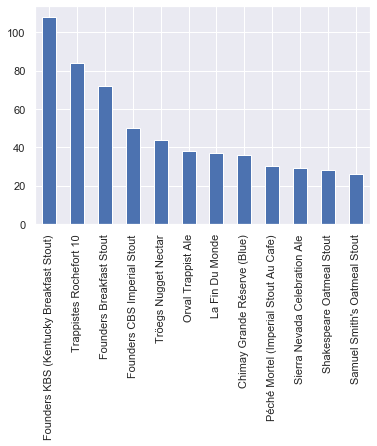

In [42]:
#plot the beer names with the highest count of reviews
list_3 = list3[0:12]
list_3.plot(kind='bar')

In [43]:
#sort values of the top rated beers 
df_top_ratings.sort_values(by = ['review_overall'], ascending = False ).head(10)\
    [ 'beer_name' ].unique()

array(['Pilsner Urquell', 'Samuel Adams Harvest Pumpkin Ale',
       'Heineken Dark Lager', 'Gandhi-Bot Double IPA',
       'Trappistes Rochefort 10', 'Cranberry Saison',
       'Founders Breakfast Stout', 'Founders Porter',
       'Samuel Adams Octoberfest', 'Racer 5 India Pale Ale'], dtype=object)

In [44]:
#remove duplicates of the same beer name
df_top_rating = df_top_ratings.drop_duplicates(subset = 'beer_name', keep = 'first')
print(len(df_top_rating))
df_top_rating.sort_values( by = ['review_overall'], ascending = False ).head(10) \
    [ 'beer_name' ].unique()

563


array(['Pilsner Urquell', 'Knuckle Sandwich',
       "30th Anniversary - Fritz And Ken's Ale", 'Saison De Lente',
       'Flying Mouflan', 'Ranger', 'Hoptimum Double IPA - Beer Camp #19',
       'Cantillon Soleil De Minuit', 'Pothole Filler Imperial Stout',
       'Barrel Aged Yeti'], dtype=object)

## Therefore, the 3 beers to recommend to a friend would be 1.)Founder's KBS,  2.) Trappistes Rochefort 10,  3.) Founder's Breakfast Stout, and  4.) Pilsner Urquel based on overall reviews and review counts of each beer.  

## 5.) Which Beer style seems to be the favorite based on Reviews written by users? How does written review compare to overall review score for the beer style?


In [45]:
#organize top beers by value counts since more reviews correlates w/ more people drinking that particular brand of beer
list5 = df_top_ratings.beer_style.value_counts()
print(list5[0:20])

American Double / Imperial Stout    424
American IPA                        161
American Double / Imperial IPA      114
Russian Imperial Stout              101
Quadrupel (Quad)                     88
Belgian Strong Dark Ale              87
American Amber / Red Ale             68
Tripel                               55
Oatmeal Stout                        55
American Barleywine                  50
Belgian Pale Ale                     44
American Strong Ale                  37
Lambic - Fruit                       34
American Stout                       33
Fruit / Vegetable Beer               33
American Pale Ale (APA)              32
American Porter                      32
Dubbel                               30
Rye Beer                             29
Doppelbock                           23
Name: beer_style, dtype: int64


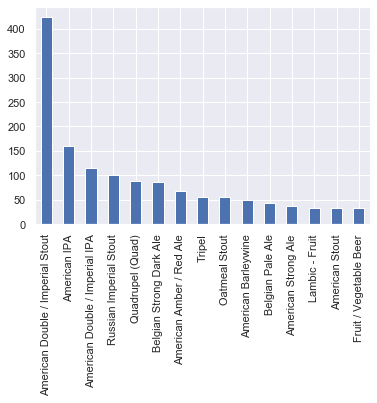

In [46]:
#plot the beer styles with the highest count of reviews
list_5 = list5[0:15]
list_5.plot(kind='bar')

In [47]:
#sort unique values to in order to choose top ten beers by beer style
df_top_ratings.sort_values( by = ['review_overall'], ascending = False ).head(20) \
    [ 'beer_style' ].unique()

array(['Czech Pilsener', 'Pumpkin Ale', 'Euro Dark Lager',
       'American Double / Imperial IPA', 'Quadrupel (Quad)',
       'Saison / Farmhouse Ale', 'American Double / Imperial Stout',
       'American Porter', 'Märzen / Oktoberfest', 'American IPA',
       'English Porter', 'Lambic - Fruit', 'Russian Imperial Stout',
       'Irish Dry Stout', 'American Amber / Red Ale', 'Gueuze', 'Dubbel',
       'Tripel'], dtype=object)

In [48]:
#remove duplicates of the same beer name
df_top_rating = df_top_ratings.drop_duplicates(subset = 'beer_style')
df_top_rating.sort_values( by = ['review_overall'], ascending = False ).head(20) \
    [ 'beer_style' ].unique()

array(['Czech Pilsener', 'Munich Helles Lager', 'American Adjunct Lager',
       'American Malt Liquor', 'Bière de Garde', 'Euro Strong Lager',
       'Old Ale', 'Irish Dry Stout', 'Dunkelweizen', 'English Brown Ale',
       'Extra Special / Strong Bitter (ESB)', 'Märzen / Oktoberfest',
       'American Brown Ale', 'American Pale Wheat Ale',
       'English Barleywine', 'Cream Ale', 'Saison / Farmhouse Ale',
       'Bock', 'Altbier', 'Weizenbock'], dtype=object)

## Therefore based on the analysis of overall reviews and the review counts of each beer, the 1.) American Double/Imperial Stout, 2.) American IPA, 3.) American Double/Imperial IPA, and the 4.) Czech Pilsner would be the best beer_styles to recommend to a friend

In [49]:
#import nltk packages in order to take a look at review_text written by users and rank based on the text
import re
import nltk
import nltk.corpus
import re
import string
from nltk.corpus import stopwords
import nltk as nlp

In [50]:
#create list of positive and negative ratings based on 25% tiers in df.
list = []
for i in df.review_overall:
    if i > 4.50:
        list.append('positive_rating')
    elif i < 3.50:
        list.append('negative_rating')    
    else:
        list.append('other')

In [51]:
#take a look at first five ratings in  the list
list[0:5]

['other', 'other', 'other', 'other', 'positive_rating']

In [52]:
#add list to data frame under column name rating
df['rating'] = list
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,year,rating
286219,17.5,111,35,Samuel Adams Triple Bock,American Strong Ale,3.0,4.0,4.0,4.5,Todd,4.5,Presentation: 8.45oz blue bottle with gold let...,1998-01-10 00:00:01,1998,other
78358,9.6,2671,140,Sierra Nevada Bigfoot Barleywine Style Ale,American Barleywine,4.0,4.0,4.5,4.0,BeerAdvocate,4.5,Presentation: 12oz short brown twist cap bottl...,1998-02-06 00:00:01,1998,other
358325,4.6,2134,115,Nutfield Auburn Ale,American Pale Ale (APA),3.0,3.0,4.0,3.0,BeerAdvocate,3.5,"Presentation: 12 oz. with the same tree scene,...",1998-03-02 00:00:01,1998,other
260534,4.8,266,91,Kingfisher Premium Lager,American Pale Lager,2.5,3.0,3.5,3.0,Todd,3.5,"Presentation: 12 oz bottle, served at this Ind...",1998-03-06 00:00:01,1998,other
372828,9.0,34,22,La Fin Du Monde,Tripel,4.0,4.0,5.0,5.0,Todd,5.0,"Presentation: ""La Fin Du Monde"", translates to...",1998-06-23 00:00:01,1998,positive_rating


In [53]:
#drop the 'other' values
dat = df[df.rating != 'other']
dat.shape

(116499, 15)

In [54]:
#Create numerical column rating that will be used later for response vector
dat['rating'] = dat.rating.map({'positive_rating':1, 'negative_rating':0})
dat.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,year,rating
372828,9.0,34,22,La Fin Du Monde,Tripel,4.0,4.0,5.0,5.0,Todd,5.0,"Presentation: ""La Fin Du Monde"", translates to...",1998-06-23 00:00:01,1998,1
374478,8.0,33,22,Maudite,Belgian Strong Dark Ale,4.5,4.5,5.0,5.0,Todd,5.0,"Presentation: ""Maudite"", translates to ""Cursed...",1998-08-26 00:00:01,1998,1
177290,4.2,13,5,Bert Grant's IPA,English India Pale Ale (IPA),2.5,3.0,3.0,3.0,Todd,2.5,Presentation: 12 oz. short bottle with Bert Gr...,1998-09-06 00:00:01,1998,0
16052,6.8,505,14,Big Man Ale,American IPA,3.5,4.0,5.0,4.5,BeerAdvocate,4.5,"Presentation: On tap. Appearance: Tawny, reddi...",2000-09-22 00:00:01,2000,1
385803,6.5,590,184,La Trappe Blond (Koningshoeven / Dominus),Belgian Pale Ale,5.0,2.5,3.0,2.5,BeerAdvocate,3.0,Presentation: 1 pint 9.4 oz brown Belgian magn...,2000-09-24 00:00:01,2000,0


In [55]:
#take a look at data frame
df4 = dat[['rating','review_text','beer_style','review_overall']]
df4.head()

,rating,review_text,beer_style,review_overall
372828,1,"Presentation: ""La Fin Du Monde"", translates to...",Tripel,5.0
374478,1,"Presentation: ""Maudite"", translates to ""Cursed...",Belgian Strong Dark Ale,5.0
177290,0,Presentation: 12 oz. short bottle with Bert Gr...,English India Pale Ale (IPA),3.0
16052,1,"Presentation: On tap. Appearance: Tawny, reddi...",American IPA,5.0
385803,0,Presentation: 1 pint 9.4 oz brown Belgian magn...,Belgian Pale Ale,3.0


In [56]:
#convert all dialogue to list of text in order to begin text pre-processing
tex = df4['review_text'].tolist()
text = str(tex)

In [57]:
#Make function to lowercase text, remove punctuation, remove whitespace and remove words containing numbers
def clean_text(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.strip()
    return text

clean = lambda x: clean_text(x)

In [58]:
# Let's take a look at the updated text
from nltk.tokenize import word_tokenize
updated_text = pd.DataFrame(df4['review_text'].apply(clean))
updated_text.head()

,review_text
372828,presentation la fin du monde translates to the...
374478,presentation maudite translates to cursed lost...
177290,presentation oz short bottle with bert grant ...
16052,presentation on tap appearance tawny reddish b...
385803,presentation pint oz brown belgian magnum co...


In [59]:
#still need to remove stop words and lemmatize to further clean
from nltk.tokenize import word_tokenize
text1 = updated_text['review_text'].tolist()
text2 = str(text1)
stop_words = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def cleaner_text(text2):
    text2 = word_tokenize(text2)
    text2 = [i for i in text2 if not i in stop_words]
    text2 = " ".join([lemmatizer.lemmatize(t) for t in text2])
    return text2

clean2 = lambda x: cleaner_text(x)

In [60]:
# Let's take a look at the updated text2
updated = pd.DataFrame(updated_text['review_text'].apply(clean2))
updated.head()

,review_text
372828,presentation la fin du monde translates end wo...
374478,presentation maudite translates cursed lost so...
177290,presentation oz short bottle bert grant neck p...
16052,presentation tap appearance tawny reddish brow...
385803,presentation pint oz brown belgian magnum cork...


In [61]:
#keep only pre-processed text;remove text from previous data frame and then merge data frames
df4.drop(['review_text'], axis=1, inplace=True)

In [62]:
#take a look at the dataframe
updated.head()

,review_text
372828,presentation la fin du monde translates end wo...
374478,presentation maudite translates cursed lost so...
177290,presentation oz short bottle bert grant neck p...
16052,presentation tap appearance tawny reddish brow...
385803,presentation pint oz brown belgian magnum cork...


In [63]:
# merge both data frames together
data = pd.concat([df4, updated], axis=1)
data.head()

,rating,beer_style,review_overall,review_text
372828,1,Tripel,5.0,presentation la fin du monde translates end wo...
374478,1,Belgian Strong Dark Ale,5.0,presentation maudite translates cursed lost so...
177290,0,English India Pale Ale (IPA),3.0,presentation oz short bottle bert grant neck p...
16052,1,American IPA,5.0,presentation tap appearance tawny reddish brow...
385803,0,Belgian Pale Ale,3.0,presentation pint oz brown belgian magnum cork...


In [64]:
#create target variable of 'good_rating' and 'bad_rating' to be response vector;
#review_text will be converted into doc term matrix 
X = data.review_text
y = data.rating
print(X.shape)
print(y.shape)

(116499,)
(116499,)


In [65]:
#divide into training and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(87374,)
(29125,)
(87374,)
(29125,)


In [66]:
#instantiate, fit,and transform test and training set into document term matrix
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print("training set:", X_train_dtm.shape)
print("test set:", X_test_dtm.shape)

training set: (87374, 99529)
test set: (29125, 99529)


In [67]:
#take a look at properties of weighted words
from sklearn.feature_extraction.text import TfidfTransformer
tf = TfidfTransformer(smooth_idf=True, use_idf=True)
tf.fit(X_train_dtm)
idf = pd.DataFrame(tf.idf_,index=vect.get_feature_names(),columns=['weights'])
sort = idf.sort_values(by=['weights'],ascending=False)
sort.weights[0:20]

leinie          11.684817
mugwort         11.684817
muller          11.684817
mulledspicy     11.684817
mulilayered     11.684817
mulholland      11.684817
mulesits        11.684817
muleing         11.684817
mulchlike       11.684817
mulched         11.684817
mulberry        11.684817
mulata          11.684817
mujch           11.684817
muito           11.684817
muis            11.684817
muir            11.684817
muiltiple       11.684817
mulletheads     11.684817
mult            11.684817
multibillion    11.684817
Name: weights, dtype: float64

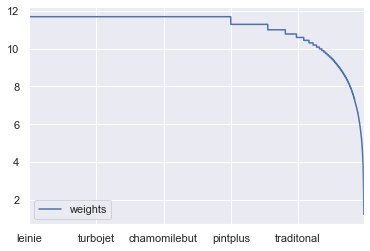

In [68]:
#plot weight distribution of words
%matplotlib inline
sort.plot()

In [69]:
#since multinomial works well for wide data sets and word classification, instantiate mulitnomialNB classifier
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

CPU times: user 87.1 ms, sys: 24.6 ms, total: 112 ms
Wall time: 118 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [70]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8980944206008584

In [71]:
# print the confusion matrix 
metrics.confusion_matrix(y_test, y_pred_class)

array([[20005,  1494],
       [ 1474,  6152]])

In [72]:
# print text for the false positives(negative_rating incorrectly classified as positive_rating) 
list2 = X_test[y_test < y_pred_class]

In [73]:
#take a look at 18 examples of the false positives
list2[0:18]

121674    fantastic seasonal brew one favorite brewery s...
413456    pours brilliant absolutely crystalclear ruddy ...
121008    apours dark amber color two finger white head ...
431802    session disc golf last weekend unfortunately b...
109799    service temperature degree service glass liter...
451851    note describe complete disgust beer ive tasted...
90851     one favorite pale ale beer smooth excellent sm...
470492    poured tulip glass kind amber copper color min...
207975    ontap beachwood bbq aged month gabe pours redd...
66484     vielen danke beerloco sending beer along other...
200053    tap jakes bar lincoln poured dark brown sporte...
519751    presentation bottle poured imperial pint glass...
367178    green apple hazy golden color plenty carbonati...
123134    pours produce light tan head doesnt stick arou...
312439    got samuel adam cream stout sampler sam adam p...
34830     appearance pours almost pure black thin layer ...
101917    purs dark straw withsome cloud

In [74]:
#take a look at review_rating of a false positive text
df.review_overall.iloc[472551]

2.5

In [75]:
#take a look at why the ml model detrmined this text to be a false positive
df.review_text.iloc[472551]

'The looks are by far the best part of this beer. It poured a clear gold/amber with great white head and lacing. The smell is a little piney but mostly of malt. The taste fairly unimpressive for the style. A strange bitterness along with a good more than healthy amount of malt. I would suggest skipping this one.'

## Looking at the false positive text, it's apparent that "the looks are best part" and "good amount of malt" was used to be sarcastic and sarcastic tones can confuse NLP ml models into thinking the text is positive when it's actually negative

In [76]:
#add list to data frame under column name rating
data['written'] = list2
data.head()

,rating,beer_style,review_overall,review_text,written
372828,1,Tripel,5.0,presentation la fin du monde translates end wo...,NaN
374478,1,Belgian Strong Dark Ale,5.0,presentation maudite translates cursed lost so...,NaN
177290,0,English India Pale Ale (IPA),3.0,presentation oz short bottle bert grant neck p...,NaN
16052,1,American IPA,5.0,presentation tap appearance tawny reddish brow...,NaN
385803,0,Belgian Pale Ale,3.0,presentation pint oz brown belgian magnum cork...,NaN


In [77]:
#drop missing values
data.dropna(inplace=True)
data.head()

,rating,beer_style,review_overall,review_text,written
520671,0,English Porter,3.0,know considered one touchstone porter judged m...,know considered one touchstone porter judged m...
10986,0,American Pale Ale (APA),3.0,great summer brew lighter body touch sweet nic...,great summer brew lighter body touch sweet nic...
489464,0,American Porter,3.0,guess im concensus yes nice chocalateroasted c...,guess im concensus yes nice chocalateroasted c...
294265,0,Winter Warmer,3.0,first time fan grew course last time christmas...,first time fan grew course last time christmas...
430050,0,American IPA,3.0,holy hophead batmangrapfruit rind smellmoderat...,holy hophead batmangrapfruit rind smellmoderat...


In [80]:
#sort unique values to in order to choose top ten beers by beer style
data.sort_values( by = ['review_overall'], ascending = False ).head(15) \
    [ 'beer_style' ].unique()

array(['English Porter', 'Russian Imperial Stout',
       'American Pale Ale (APA)', 'American Double / Imperial Stout',
       'American Double / Imperial IPA', 'American Stout',
       'American Amber / Red Ale', 'American IPA', 'Quadrupel (Quad)',
       'Rauchbier', 'English Pale Ale'], dtype=object)

In [81]:
#sort unique values to in order to choose top ten beers by beer style
df_top_ratings.sort_values( by = ['review_overall'], ascending = False ).head(15) \
    [ 'beer_style' ].unique()

array(['Czech Pilsener', 'Pumpkin Ale', 'Euro Dark Lager',
       'American Double / Imperial IPA', 'Quadrupel (Quad)',
       'Saison / Farmhouse Ale', 'American Double / Imperial Stout',
       'American Porter', 'Märzen / Oktoberfest', 'American IPA',
       'English Porter', 'Lambic - Fruit', 'Russian Imperial Stout',
       'Irish Dry Stout'], dtype=object)

## So American Double/Imperial IPA , American Double/Imperial Stout, American IPA and Quad are the same best beer_styles in both reviews_overall and review_texts.  Even though there were false positives in the text analysis, the NLP model accuracy was high at 90% and the false positives were low at 1494 out of 29,125 (~5%).  Therefore, both review_texts and reviews_overall were fairly equivalent predictors of beer_style.